In [10]:
# https://www.tensorflow.org/tutorials/keras/classification
import pandas as pd

import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)


2.5.0


In [11]:
# http://yann.lecun.com/exdb/mnist/
fashion_mnist = tf.keras.datasets.fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [12]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


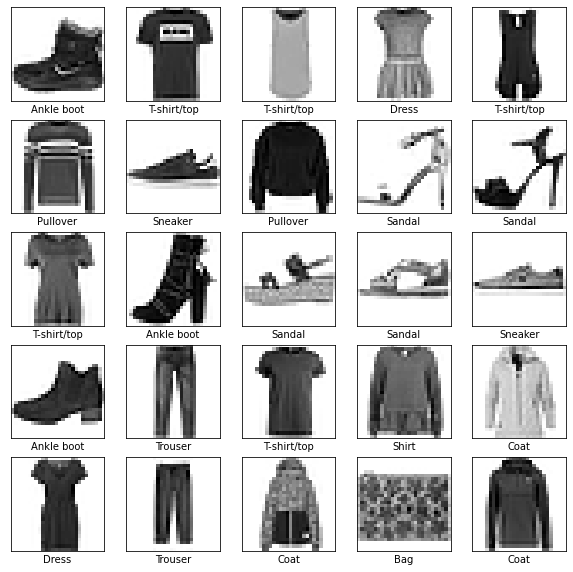

In [13]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()


In [14]:
# re-scale the image data to values between (0.0,1.0]
X_train = X_train.astype('float32') / 255.
X_test = X_test.astype('float32') / 255.

In [15]:
y_train = y_train.reshape(-1,1)
y_train.shape

(60000, 1)

In [16]:
from sklearn.preprocessing import OneHotEncoder
# One Hot encode the class labels
encoder = OneHotEncoder(sparse=False)
y = encoder.fit_transform(y_train)
y.shape

(60000, 10)

In [17]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(2, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')

])

In [18]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])


In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 2)                 1570      
_________________________________________________________________
dense_1 (Dense)              (None, 10)                30        
Total params: 1,600
Trainable params: 1,600
Non-trainable params: 0
_________________________________________________________________


In [20]:
history = model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 1s 631us/step - loss: 1.5381 - accuracy: 0.3852
Epoch 2/10
1875/1875 [==============================] - 1s 637us/step - loss: 1.1433 - accuracy: 0.5416
Epoch 3/10
1875/1875 [==============================] - 1s 572us/step - loss: 1.0536 - accuracy: 0.5830
Epoch 4/10
1875/1875 [==============================] - 1s 559us/step - loss: 1.0009 - accuracy: 0.6088
Epoch 5/10
1875/1875 [==============================] - 1s 569us/step - loss: 0.9611 - accuracy: 0.6244
Epoch 6/10
1875/1875 [==============================] - 1s 550us/step - loss: 0.9287 - accuracy: 0.6394
Epoch 7/10
1875/1875 [==============================] - 1s 561us/step - loss: 0.9012 - accuracy: 0.6528
Epoch 8/10
1875/1875 [==============================] - 1s 560us/step - loss: 0.8809 - accuracy: 0.6646
Epoch 9/10
1875/1875 [==============================] - 1s 559us/step - loss: 0.8626 - accuracy: 0.6719
Epoch 10/10
1875/1875 [==============================] - 1s 576u

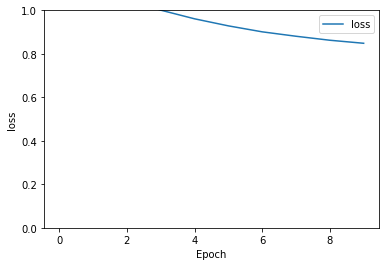

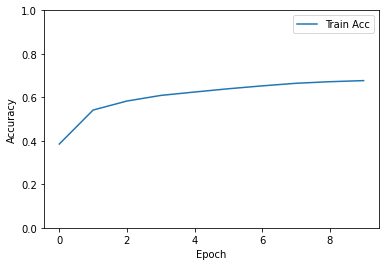

In [21]:
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('loss')
    plt.plot(hist['epoch'], hist['loss'],
           label='loss')
    #plt.plot(hist['epoch'], hist['val_loss'],
    #       label = 'Val loss')
    plt.ylim([0,1])
    plt.legend()

    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.plot(hist['epoch'], hist['accuracy'],
           label='Train Acc')
    #plt.plot(hist['epoch'], hist['val_accuracy'],
    #       label = 'Val Acc')
    plt.ylim([0,1])
    plt.legend()
    plt.show()


plot_history(history)


In [27]:
scores = model.evaluate(X_test, y_test)
print("Accuracy: {}".format(scores[1]))


313/313 [==============================] - 0s 482us/step - loss: 0.8445 - accuracy: 0.6933
Accuracy: 0.6933000087738037


In [28]:
predictions = model.predict(X_test)
print(predictions.shape)


(10000, 10)


In [29]:
pred = np.argmax(predictions, axis=1)
pred.shape

(10000,)

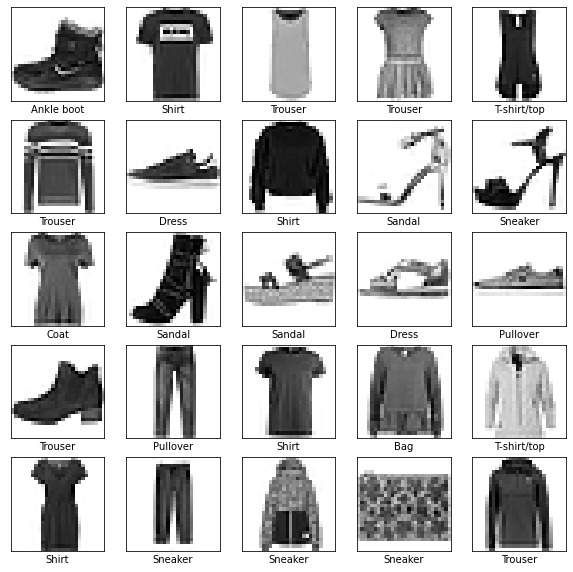

In [30]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[pred[i]])
plt.show()
